In [1]:
#RQ1: loss analisys results!
"""EXPERIMENTAL RESULT FILES

RQ1_all_losses_race_sex.csv
- 40 runs of bias mit with mult attrs!!
- only valid for compas as for adult the EN kept erroring!!

RQ1_all_losses_race.csv, RQ1_all_losses_sex.csv
- 20 runs of compas, 16 of adult
- has also german which should be ignored
- does not use all metrics
- these tests should be rerun at the end for all metrics

RQ1_all_losses_v2_race.csv, RQ1_all_losses_v2_sex.csv
- same setup but more metrics
- remaining 20x compas and 24x adult
"""


'EXPERIMENTAL RESULT FILES\nRQ1_all_losses_race.csv, RQ1_all_losses_sex.csv\n- 20 runs of compas, 16 of adult\n- has also german which should be ignored\n- does not use all metrics\n- these tests should be rerun at the end for all metrics\n\nRQ1_all_losses_v2_race.csv, RQ1_all_losses_v2_sex.csv\n- same setup but more metrics\n- remaining 20x compas and 24x adult\n'

In [2]:


"""
RQ1: WHICH LOSS

Rule out based on prediction performance on adult (compas has good performance for all):
- FL the lowest performance on all 4 metrics
- FK, L, VAE, also significantly lowest metrics for adult sex and very high variance
- F 2nd lowest performance and high var on adult race

- FP, LP, P, KL, KP, K all have similar results 

note that all well performing losses seem to use either K or P


BIAS mit performance?

KL, KP, K seem to have consistently good DI, SF, ASPD, for botgh datasets and attributes

PLAN: 
keep going with the KL, KP, K
KL - is advrserial so ideally would rule it out due to time constraints. if K does not reliably perform this will be suggested as the alternative without using Y labels!!!
KP - seems best BUT uses Y. (justify KP by the lower var on adult race aod???? ... sus)
K - seems bit more variance and less debias but will wait for enough evidence

"""


'\nRQ1: WHICH LOSS\n\nRule out based on prediction performance on adult (compas has good performance for all):\n- FL the lowest performance on all 4 metrics\n- FK, L, VAE, also significantly lowest metrics for adult sex and very high variance\n- F 2nd lowest performance and high var on adult race\n\n- FP, LP, P, KL, KP, K all have similar results \n\nnote that all well performing losses seem to use either K or P\n\n\nBIAS mit performance?\n\nKL, KP, K seem to have consistently good DI, SF, ASPD, for botgh datasets and attributes\n\nPLAN: \nkeep going with the KL, KP, K\nKL - is advrserial so ideally would rule it out due to time constraints. if K does not reliably perform this will be suggested as the alternative without using Y labels!!!\nKP - seems best BUT uses Y. (justify KP by the lower var on adult race aod???? ... sus)\nK - seems bit more variance and less debias but will wait for enough evidence\n\n'

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# SAVE TO RESULTS FILE

In [4]:
write = True
if write:
    for attr in [["sex"],["race"],["race", "sex"]]:
        filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
        if len(attr)>1:
            filenames = ["RQ1_all_losses_v2_"]
            
        files = [ os.path.join("results",name +"_".join(attr)+".csv") for name in filenames]
        
        reader = ResultsReader(files)
        reader.df = reader.df[~(reader.df["data"].str.contains('German'))]
        file_start = os.path.join("RQ1","_".join(attr))
        
        df = reader.get_relative_metrics(use_percent=True)
        df[reader.ML] = ''
        mean_df = df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(file_start+'_mean_change.csv', index=False)
        
        df = reader.get_relative_metrics(use_percent=True)
        df[reader.ML] = ''
        mean_df = df.groupby(reader.filterable).std().reset_index()
        mean_df.to_csv(file_start+'_change_std.csv', index=False)
        
        df = reader.get_mean_metrics()
        df[reader.ML] = ''
        mean_df = df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(file_start+'_mean_vals.csv', index=False)
        
        df = reader.get_filtered_df()
        df[reader.ML] = ''
        mean_df = df.groupby(reader.filterable).std().reset_index()
        mean_df.to_csv(file_start+'_vals_std.csv', index=False)




File 'results\RQ1_all_losses_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_race.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_race.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_race_sex.csv' successfully loaded as DataFrame.


# VISUALIZE

In [11]:
attr = 'sex'

filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
files = [ os.path.join("results",name +attr+".csv") for name in filenames]
reader = ResultsReader(files)
reader.df = reader.df[~(reader.df["data"].str.contains('German'))]

all_metrics = reader.metrics


for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    

File 'results\RQ1_all_losses_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_sex.csv' successfully loaded as DataFrame.
['Compas Dataset', 'Adult Dataset']
['nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier', 'LogisticRegression']
["['sex']"]
['FYP VAE', 'LFR', 'Reweighing Bias Mitigation', 'FairBalance Bias Mitigation', 'FairMask Bias Mitigation', 'No Bias Mitigation']
['{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1800, latent_dim=17, mask_values=None vae_layers=(100, 75, 50), lr=0.006, \\nlosses_used=[\'Sensitive KL loss\', \'Latent sens ADV loss\', \'Reconstruction loss\', \'KL divergence loss\'])Sensitive KL loss: {\'weight\': 9000, \'sens_col_ids\': [7]}, Latent sens ADV loss: {\'weight\': 0.1, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 16}, Reconstruction loss: {\'weight\': 15}, KL divergence loss: {\'weight\': 0.05}, Flipped ADV loss: 

____________________________________________________________________________________________________
Compas Dataset , ['nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier', 'LogisticRegression'] ['sex']


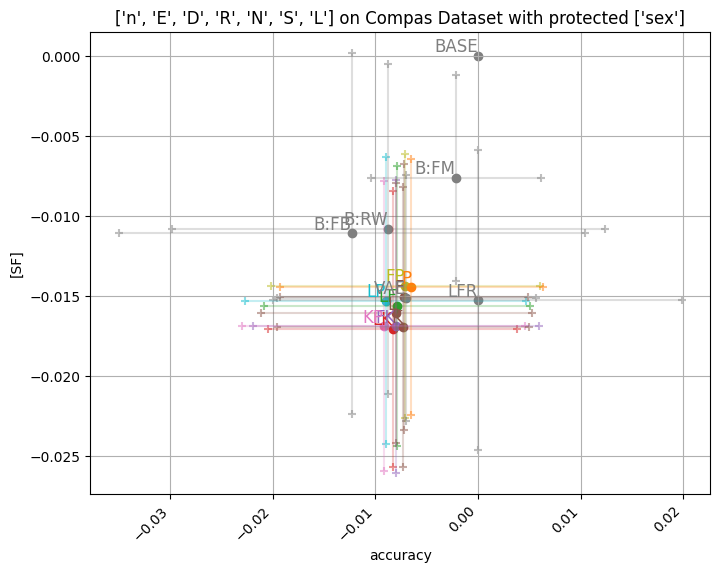

____________________________________________________________________________________________________
Adult Dataset , ['nn keras', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestClassifier', 'NaiveBayes', 'SupportVectorClassifier', 'LogisticRegression'] ['sex']


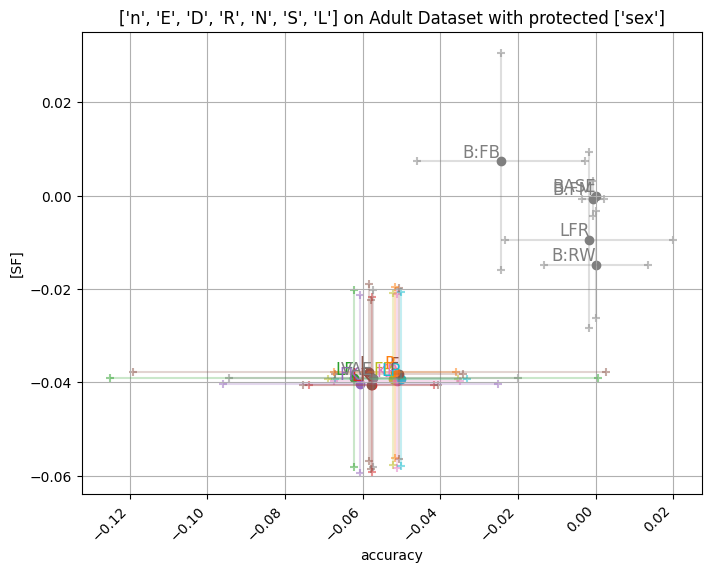

In [12]:
display = True
metrics_to_use = ["SF", "pres"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)]


if display:

    def f(df):
        loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
        loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
        general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
        performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
        #return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
        return df#[~(df["other"].str.contains('LFR'))]
    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.show_legend = False
    grapher.separate_ml_models = False
    grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_2D_STD)



____________________________________________________________________________________________________
Compas Dataset , ['nn keras'] ['sex']
no rows found
____________________________________________________________________________________________________
Compas Dataset , ['ElasticNet'] ['sex']
no rows found
____________________________________________________________________________________________________
Compas Dataset , ['DecisionTreeRegressor'] ['sex']
no rows found
____________________________________________________________________________________________________
Compas Dataset , ['RandomForestClassifier'] ['sex']
no rows found
____________________________________________________________________________________________________
Compas Dataset , ['NaiveBayes'] ['sex']
no rows found
____________________________________________________________________________________________________
Compas Dataset , ['SupportVectorClassifier'] ['sex']
no rows found
____________________________________

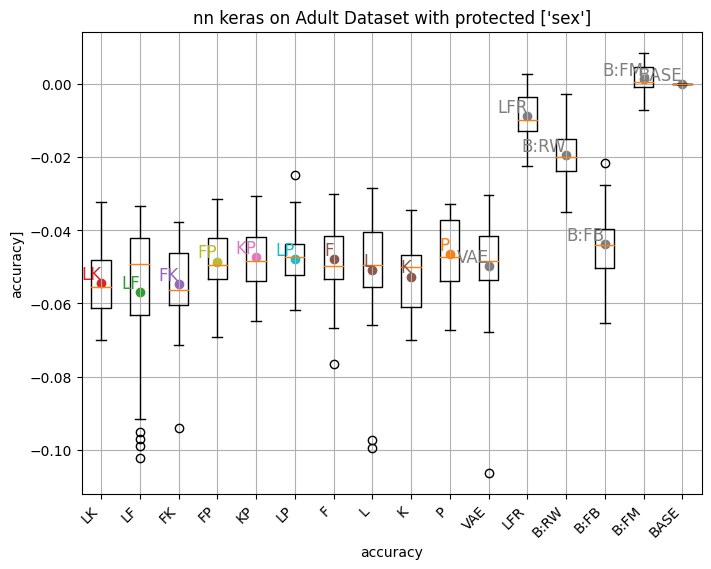

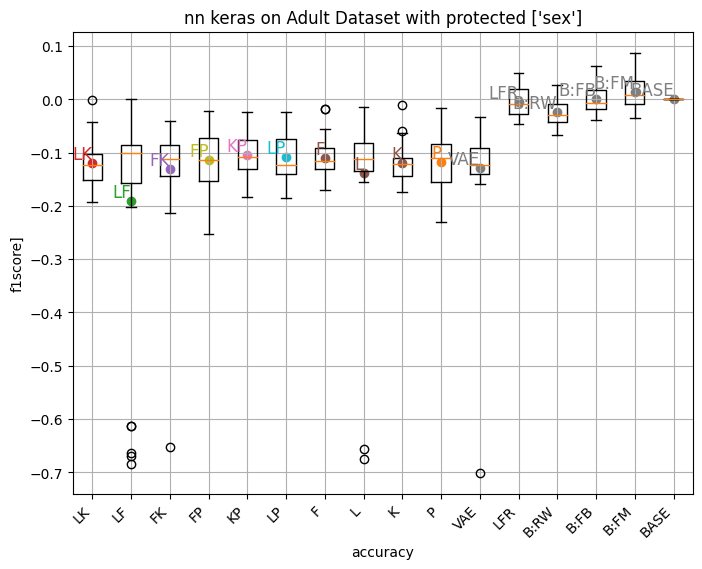

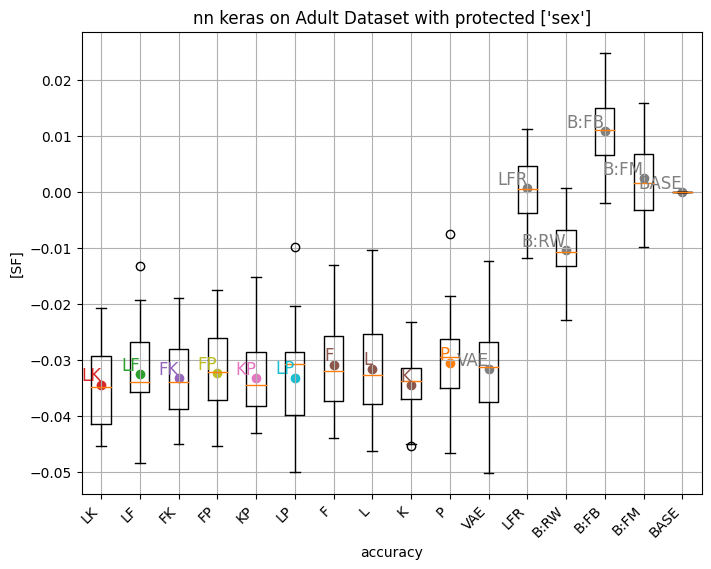

____________________________________________________________________________________________________
Adult Dataset , ['ElasticNet'] ['sex']


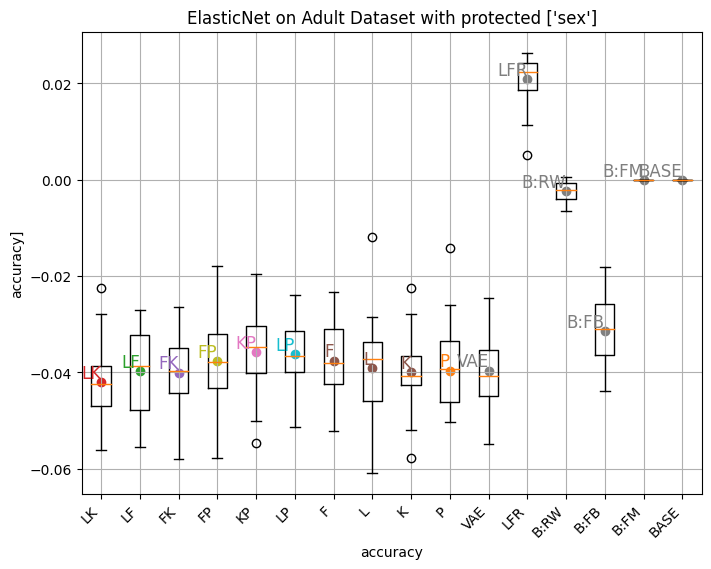

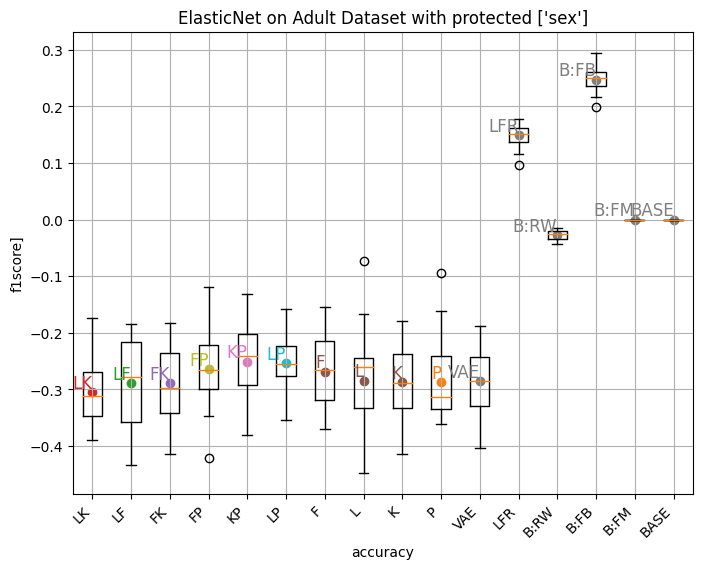

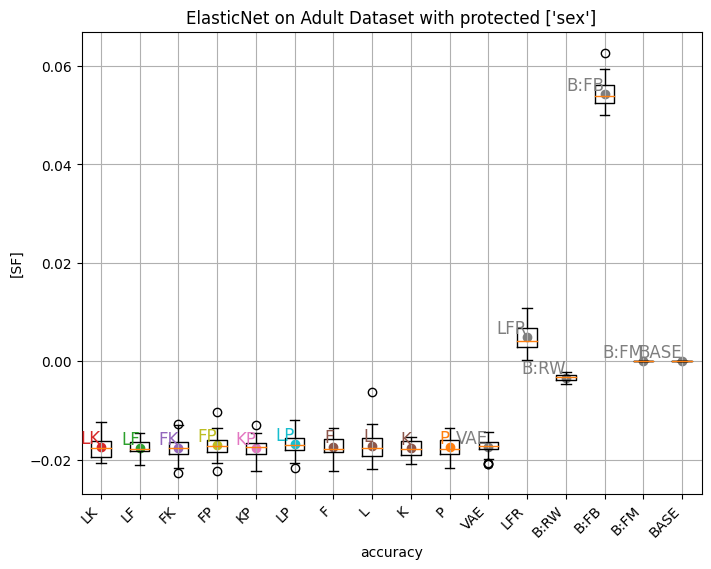

____________________________________________________________________________________________________
Adult Dataset , ['DecisionTreeRegressor'] ['sex']


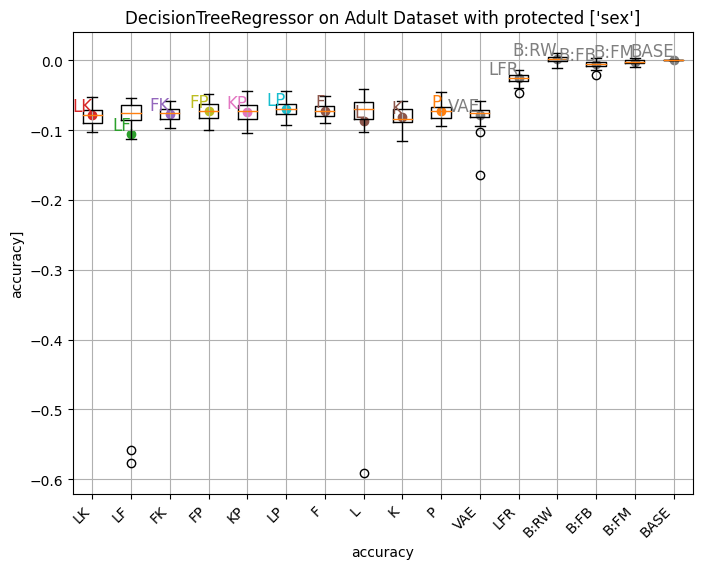

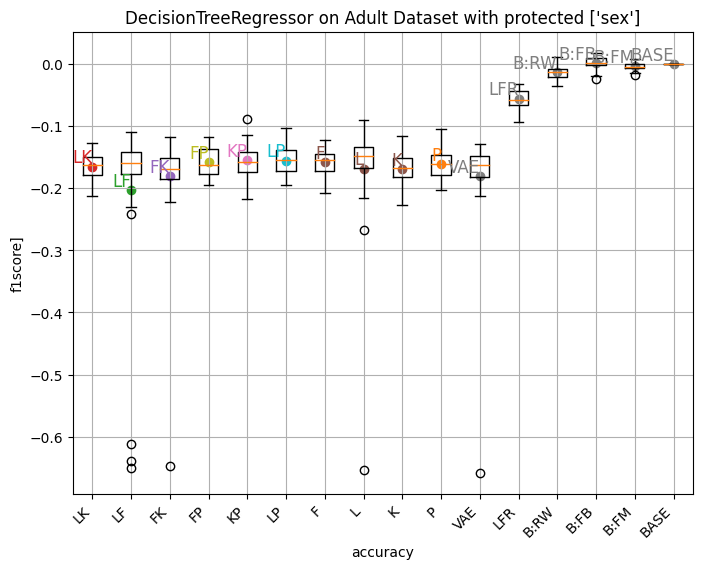

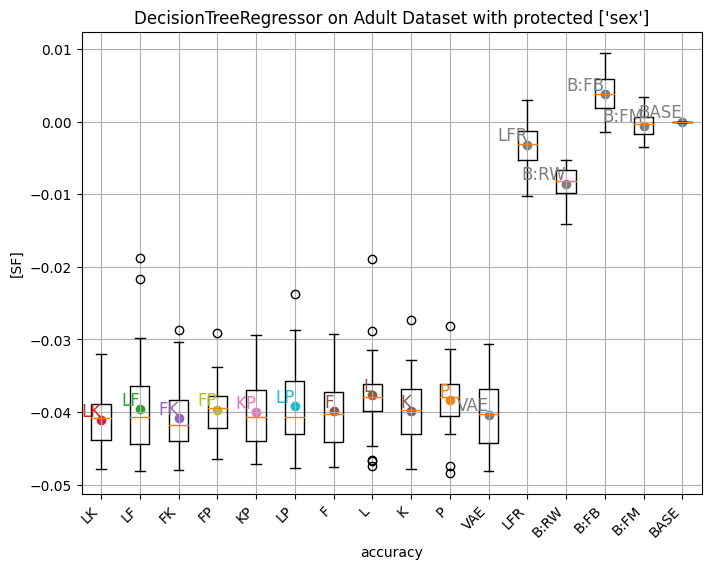

____________________________________________________________________________________________________
Adult Dataset , ['RandomForestClassifier'] ['sex']


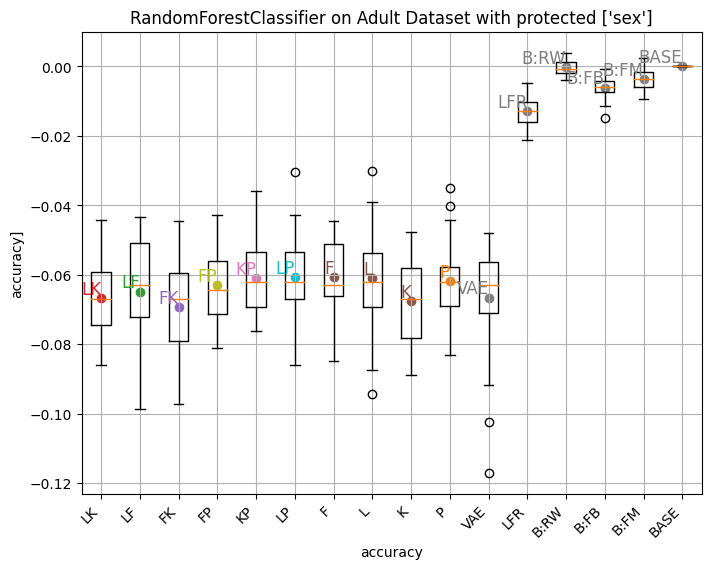

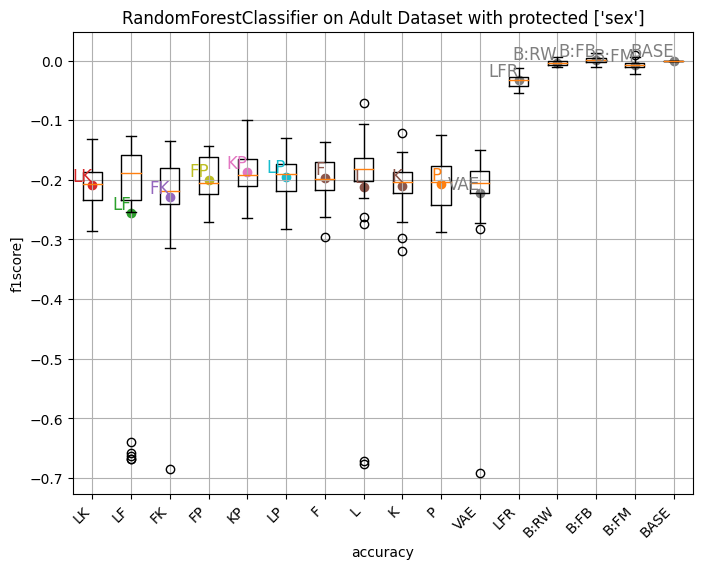

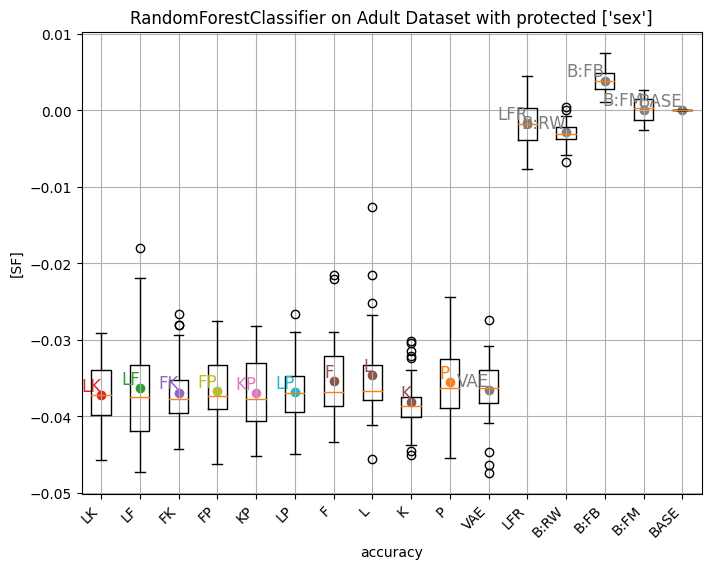

____________________________________________________________________________________________________
Adult Dataset , ['NaiveBayes'] ['sex']


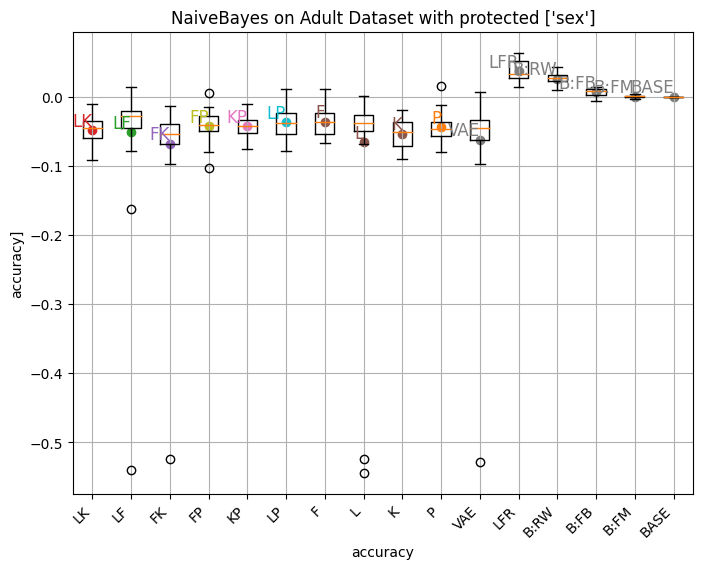

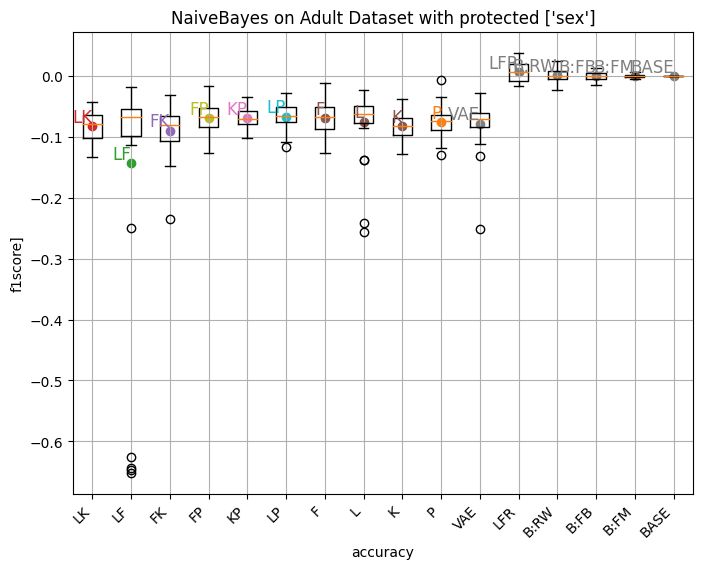

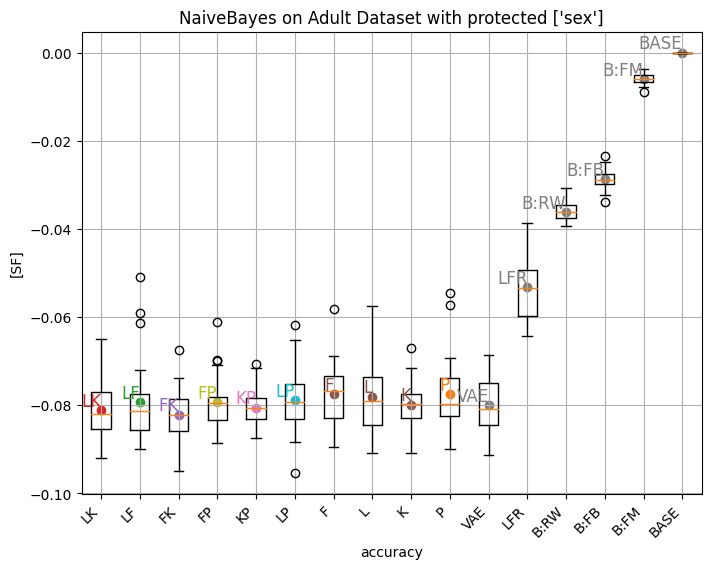

____________________________________________________________________________________________________
Adult Dataset , ['SupportVectorClassifier'] ['sex']


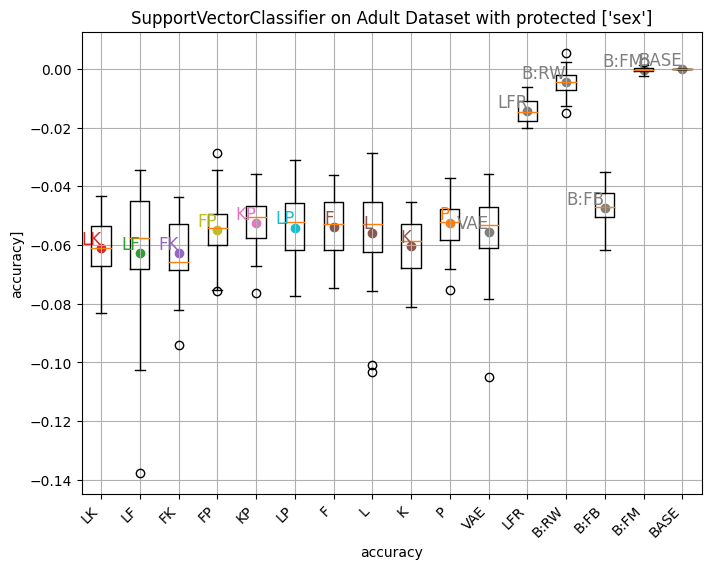

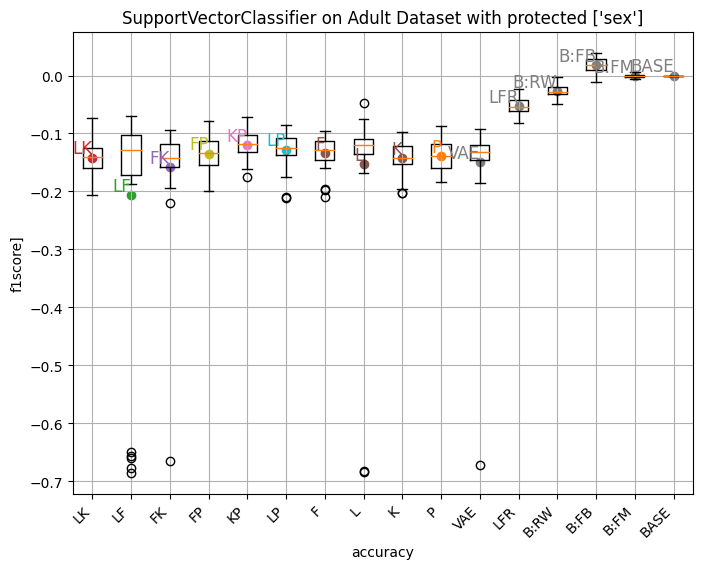

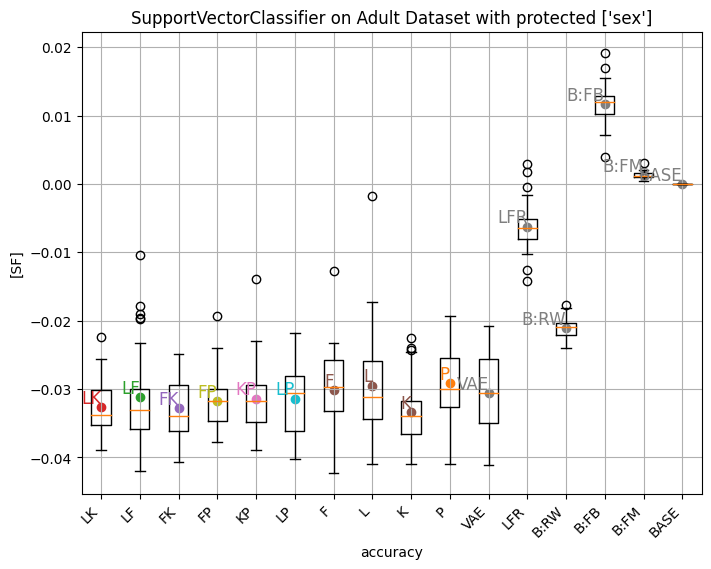

____________________________________________________________________________________________________
Adult Dataset , ['LogisticRegression'] ['sex']


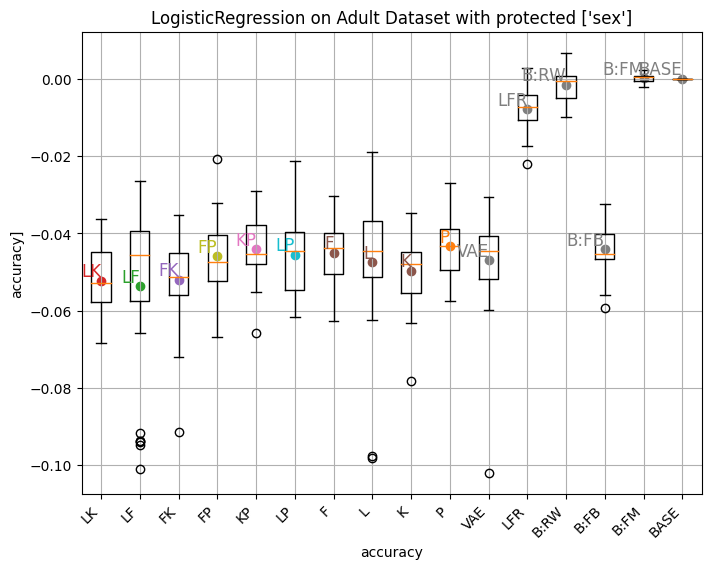

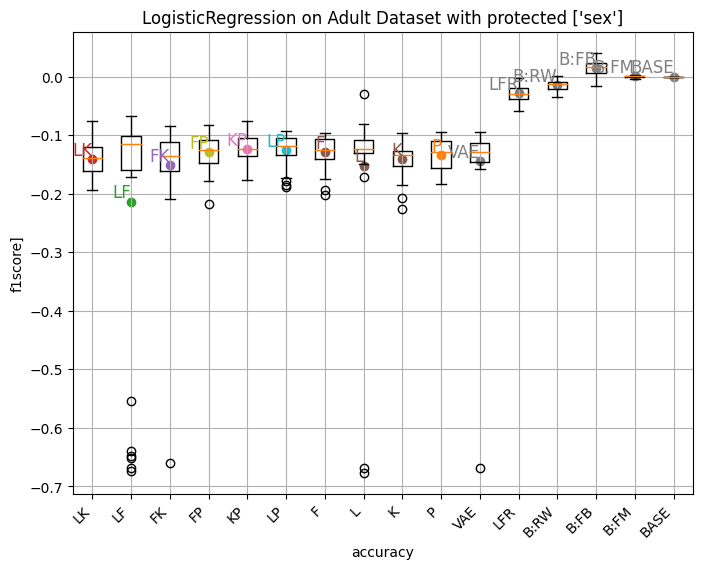

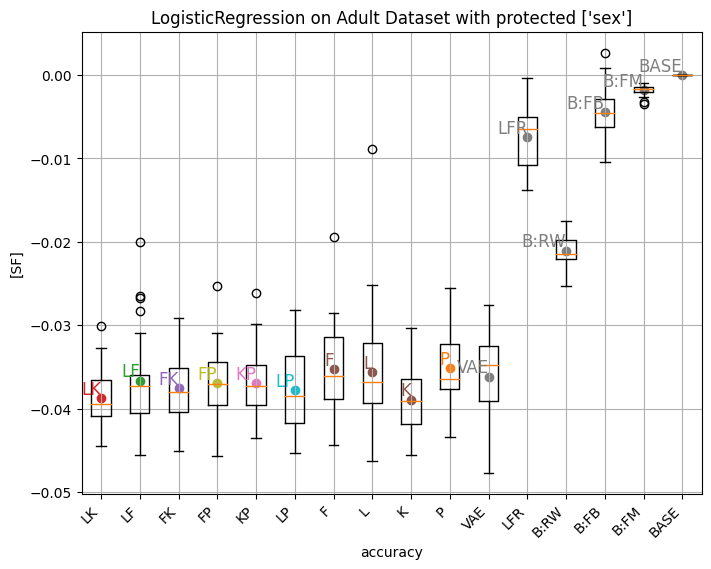

In [13]:
display = True
metrics_to_use = ["SF", "accu", "f1"] 
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)]


if display:
    def f(df):
        return df[(df["data"].str.contains('Adult'))]#[~(df["other"].str.contains('LFR'))]

    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.show_legend = False
    grapher.separate_ml_models = True
    #grapher.plot_metrics_vs_metric(mean=False, relative=False, metrics = metrics_to_display, metric = Metrics.MEAN_Y)
    grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_IQR)
